In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df= pd.read_csv('/content/hotel_bookings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


COUNT MISSING VALUES


In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

In [9]:
missing_df = pd.DataFrame({"Missing Values": missing, "Percent": missing_pct})
print(missing_df[missing_df["Missing Values"] > 0])


          Missing Values    Percent
company           112593  94.306893
agent              16340  13.686238
country              488   0.408744
children               4   0.003350


VISULIZATION

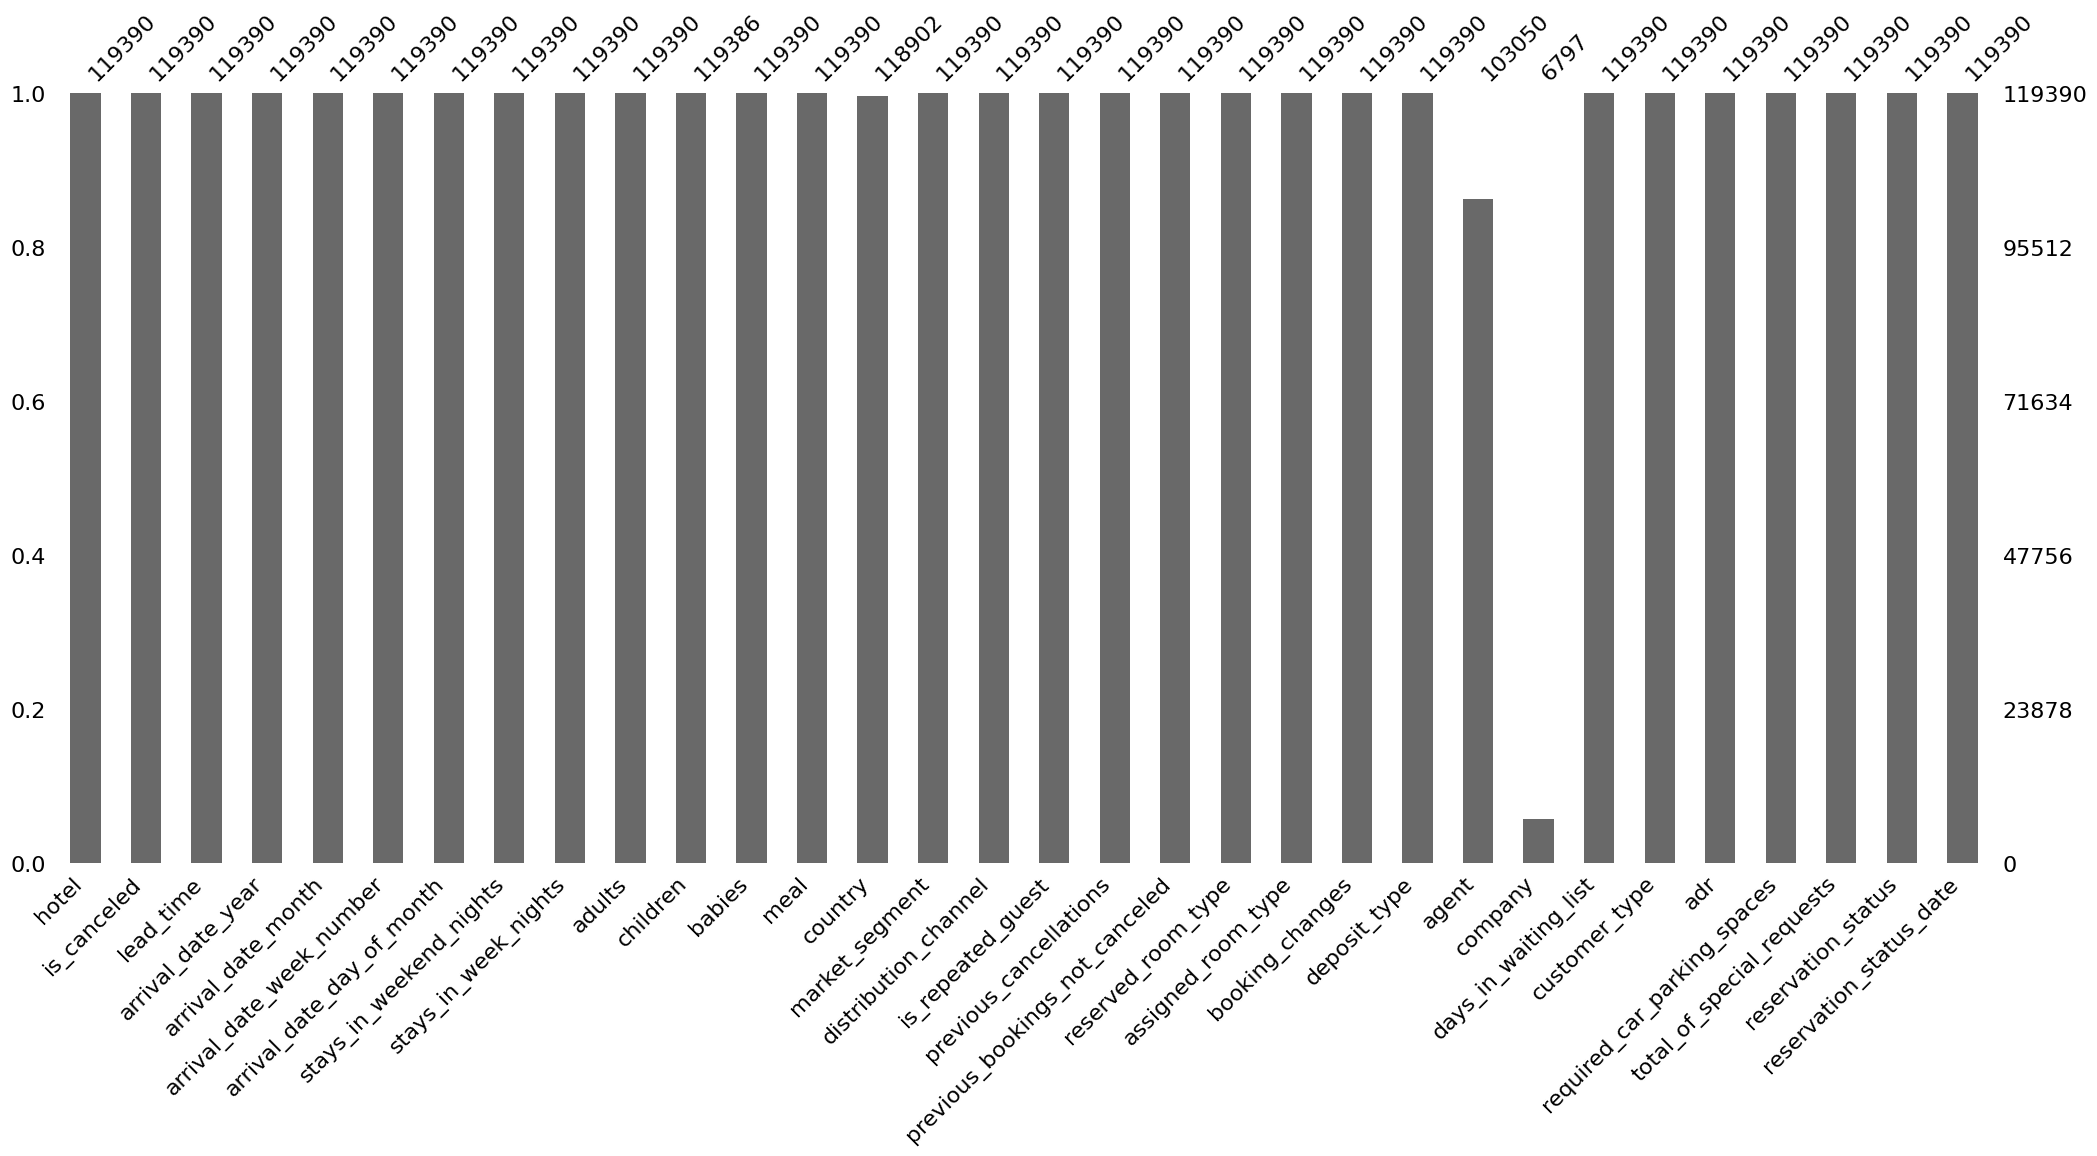

In [18]:
msno.bar(df)
plt.show()

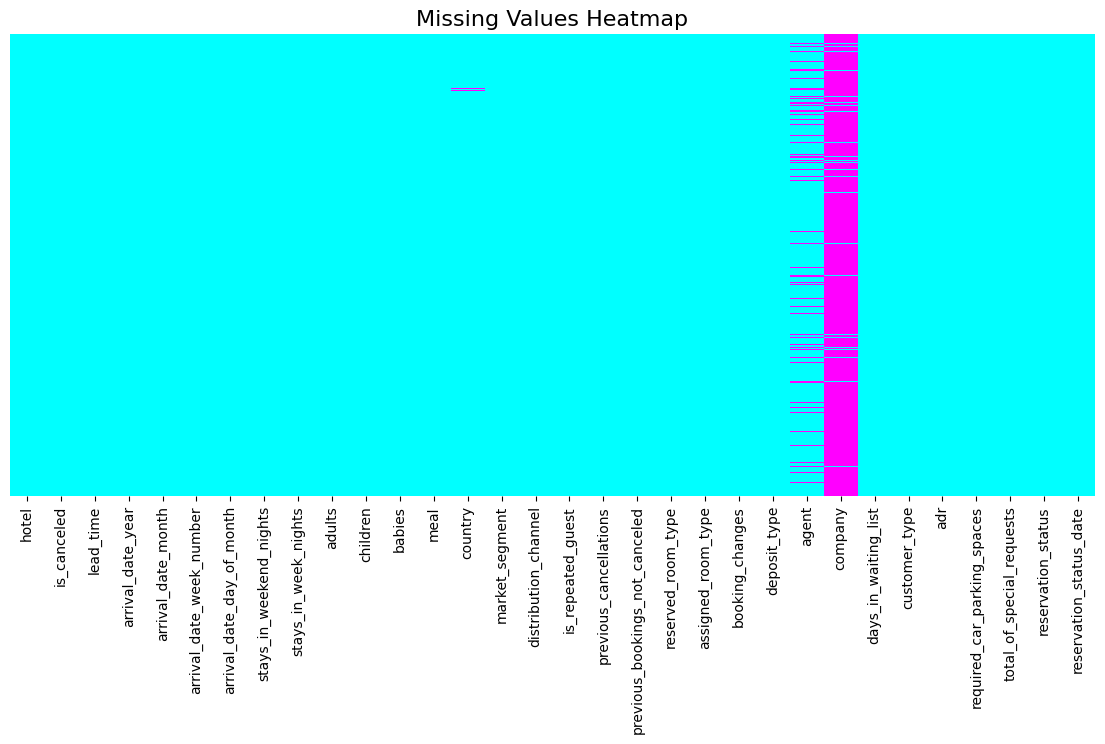

In [19]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap="cool", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()

detect outliers


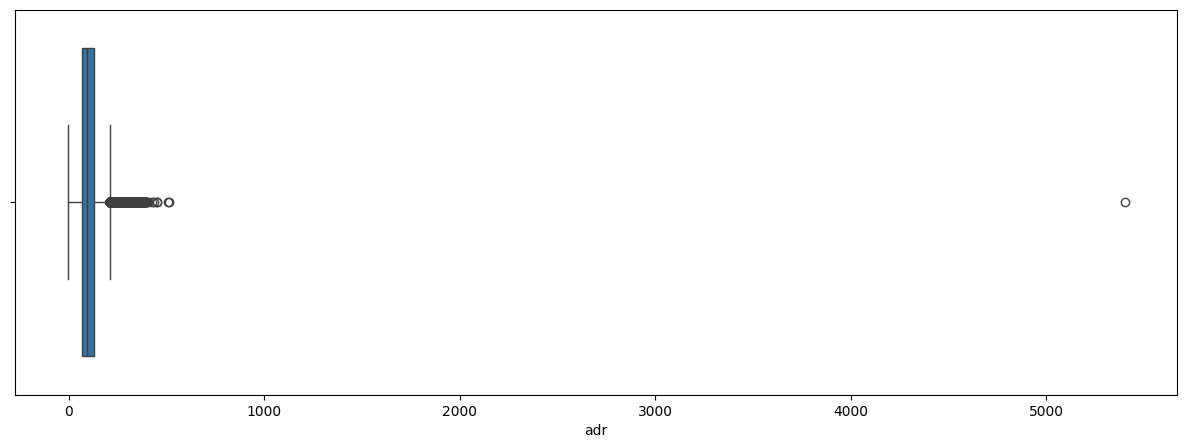

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df["adr"])
plt.show()

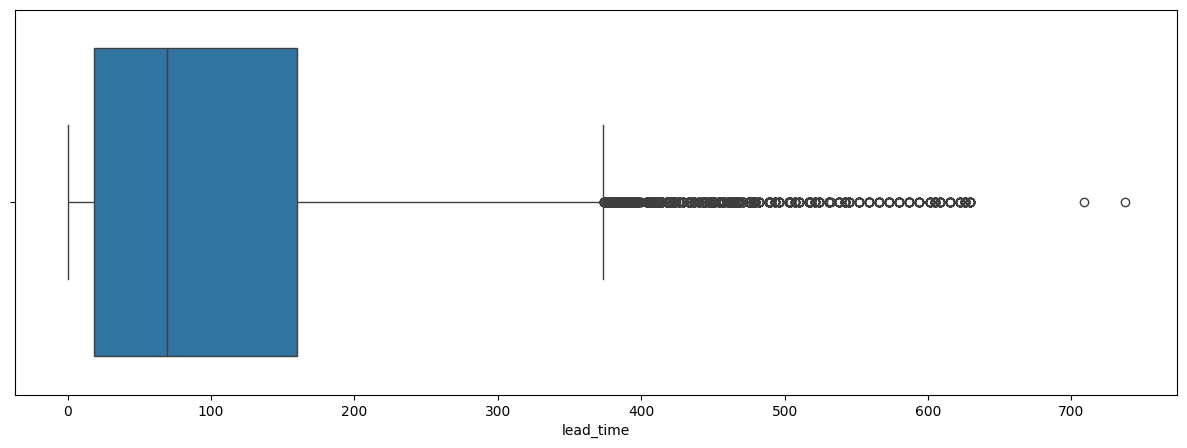

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df["lead_time"])
plt.show()

In [24]:
# IQR Method
Q1 = df["adr"].quantile(0.25)
Q3 = df["adr"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["adr"] < (Q1 - 1.5 * IQR)) | (df["adr"] > (Q3 + 1.5 * IQR))]
print(f"Outliers in ADR: {len(outliers)}")

Outliers in ADR: 3793


agent and company → many missing values.

country → some missing values.

children → small number of **missing**





In [25]:
# Company & Agent
df["company"] = df["company"].fillna(0)
df["agent"] = df["agent"].fillna(0)

# Country → Mode
df["country"] = df["country"].fillna(df["country"].mode()[0])

# Children → Median
df["children"] = df["children"].fillna(df["children"].median())

# Drop duplicates
df = df.drop_duplicates()

# Handle outliers: Cap ADR at 1000
df["adr"] = np.where(df["adr"] > 1000, 1000, df["adr"])

# Fix data types
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])


In [26]:
# Total guests
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

# Total nights
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

# Is family booking?
df["is_family"] = np.where((df["children"] + df["babies"]) > 0, 1, 0)


 **Encoding Categorical Variables**

In [27]:
# Low-cardinality: One-hot encoding
df = pd.get_dummies(df, columns=["meal", "market_segment"], drop_first=True)

# High-cardinality: Country → frequency encoding
country_freq = df["country"].value_counts(normalize=True)
df["country_enc"] = df["country"].map(country_freq)
df = df.drop("country", axis=1)

In [28]:
df = df.drop(["reservation_status", "reservation_status_date"], axis=1)


**testing the split**

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

print(train.shape, test.shape)


(69901, 42) (17476, 42)
